<img style="float: left;;" src='Figures/alinco.png' /></a>
# <center> <font color= #000047> Shapelets </font> </center>

<AxesSubplot:>

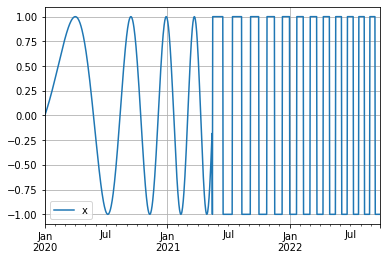

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cuadrada(x,a=1):
    Y=np.sin(x)
    s=[]
    for y in Y:
        if y<0:
            s.append(-a)
        elif y>0:
            s.append(a)
    return np.array(s)
N=1000
t=pd.date_range('2020-01-01',periods=N)
w1=np.linspace(0.01,0.05,N//2)
w2=np.linspace(0.05,0.1,N//2)

x1=np.sin(w1*np.arange(N//2))
x2=cuadrada(w2*np.arange(N//2+1,N+1))
x=np.concatenate([x1,x2])
st=pd.DataFrame(index=t,data=x,columns=['x'])
st.plot(grid=True)

In [2]:
st

,x
2020-01-01,0.000000
2020-01-02,0.010080
2020-01-03,0.020319
2020-01-04,0.030717
2020-01-05,0.041271
...,...
2022-09-22,-1.000000
2022-09-23,-1.000000
2022-09-24,-1.000000
2022-09-25,-1.000000


<AxesSubplot:>

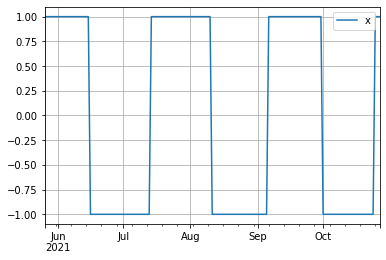

In [10]:
#Inicialización de parámetros de la shapelet candidata
w = np.random.randint(50,200) 
i = np.random.randint(0,N-w)  

s = st[i:i+w]
s.plot(grid=True)

In [11]:
w, i

(155, 511)

In [12]:
from scipy.stats import zscore # z = (x - x.mean())/std

In [13]:
# Encontramos la relación entre la shapelet candidata y la serie de tiempo
#
# Definimos la métrica
   # Correlación ('a' y 'b' de longitud 'm')
def C(a,b):
    m=len(a)
    ma = np.mean(a)
    mb = np.mean(b)
    sa = np.std(a)
    sb = np.std(b)
    return (np.sum(a*b) - m*ma*mb)/(m*sa*sb)

def d(a,b): #Distancia de a y b
    a = zscore(a)
    b = zscore(b)
    
    return np.sqrt(2*(1-np.round(C(a,b),5)))


In [14]:
m = 100
a = np.random.rand(m)
b = np.random.rand(m)
d(a,b)

1.3511846653955186

In [15]:
d(a,2*a)

0.0

In [16]:
C(a,2*a)

1.0000000000000002

In [23]:
 # Correlación ('a' y 'b' tienen diferente longitud)
def C(a,b):
    m = min(len(a), len(b))
    n = max(len(a), len(b))
    
    if len(a)>len(b):
        B = a
        A = b
    else:
        B = b
        A = a
    ma = np.mean(A)
    mb = np.mean(B)
    sa = np.std(A)
    sb = np.std(B)
    
    Corr = np.inf
    for l in range(n-m):
        Corr = min(Corr, (np.sum(A*B[l:l+m]) - m*ma*mb)/(m*sa*sb))
    
    return Corr
    

In [24]:
a = np.random.rand(150)
b = np.random.rand(100)

In [25]:
C(a,b)

-0.19152836969256237

In [26]:
def d(a,b): #Distancia de a y b
    a = zscore(a)
    b = zscore(b)
    
    return np.sqrt(2*(1-np.round(C(a,b),5)))


In [27]:
d(a,b)

1.53589713197206

In [28]:
from scipy.optimize import minimize_scalar

In [29]:
d(s['x'], st['x'])

2.0062103578638006

In [30]:
def obj(i, st):
    i = int(np.round(i))
    s = st[i:i+w]
    return d(s,st)

In [35]:
obj(i, st['x'])

2.0062103578638006

In [36]:
#Modificar el valor de w
w = 100
sol = minimize_scalar(obj, bounds=(0,N-w), method='Bounded', args=(st['x']))
sol

     fun: 1.896417675513493
 message: 'Solution found.'
    nfev: 36
  status: 0
 success: True
       x: 209.6661185263728

<AxesSubplot:>

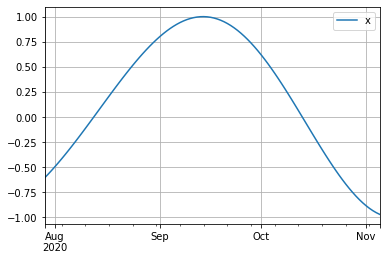

In [39]:
i1 = int(np.round(sol.x))
s1 = st[i1:i1+w]
s1.plot(grid=True)

In [40]:
w = 100
sol2 = minimize_scalar(obj, bounds=(0,i1-w), method='Bounded', args=(st['x']))
i2=int(np.round(sol2.x))
i2, sol2.fun

(42, 1.871982905904859)

<AxesSubplot:>

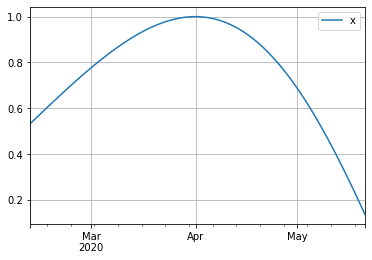

In [41]:
s2 = st[i2:i2+w]
s2.plot(grid=True)

In [42]:
w = 100
sol3 = minimize_scalar(obj, bounds=(i1+w,N-w), method='Bounded', args=(st['x']))
i3=int(np.round(sol3.x))
i3, sol3.fun

(674, 2.019925741209315)

<AxesSubplot:>

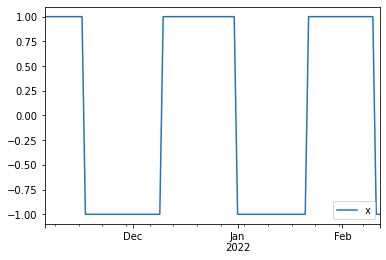

In [43]:
s3 = st[i3:i3+w]
s3.plot()

C:\Users\uie70742\AppData\Local\Temp/ipykernel_45996/2571306627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s1['clase'] = 1
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45996/2571306627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2['clase'] = 2
C:\Users\uie70742\AppData\Local\Temp/ipykernel_45996/2571306627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

<AxesSubplot:>

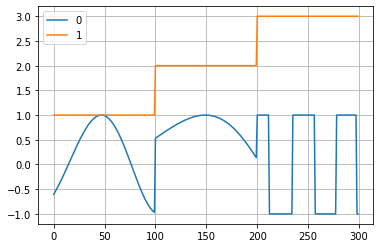

In [45]:
# Diccionario de patrones
#
# Escogemos s2 y s3 para clasificar 'st'
s1['clase'] = 1
s2['clase'] = 2
s3['clase'] = 3
S=np.concatenate([s1.values, s2.values, s3.values])
S = pd.DataFrame(S)
S.plot(grid=True)

In [46]:
S.columns=['x','clase']

In [48]:
S.head()

,x,clase
0,-0.603685,1.0
1,-0.568242,1.0
2,-0.531576,1.0
3,-0.493746,1.0
4,-0.454814,1.0


In [49]:
from sklearn.tree import DecisionTreeClassifier

<AxesSubplot:>

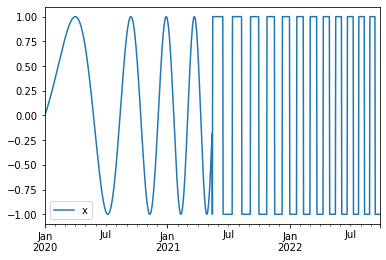

In [51]:
st.plot()

In [52]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(S[['x']], S['clase'])

DecisionTreeClassifier(max_depth=5)

<AxesSubplot:>

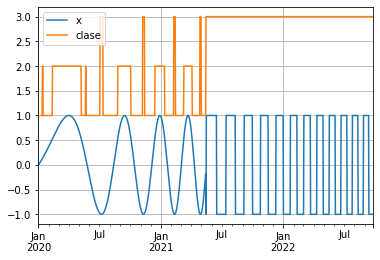

In [53]:
st['clase'] = dtc.predict(st[['x']])
st.plot(grid=True)

In [54]:
st.groupby('clase')['x'].count()

clase
1.0    294
2.0    182
3.0    524
Name: x, dtype: int64